$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Introduction to the general linear model

These are some notes on simple regression, multiple regression, and the
general linear model.

The first thing is the setting up a simple regression.
Then, I'll attempt to demonstrate how a *design matrix* expresses a basic regression. After that, i will extend simple regression to multiple
regression.
With the addition of some specially formed regressors, I can express group membership, and therefore do analysis of variance.
The last step is multiple regression becomes the general linear model.

### About this page

I will go through regression and the general linear model.

### The example regression problem

Assume for the moment that I have assessed 12 students' "psychopathy" personality traits. In addition, we possess other details regarding these pupils. For instance, we recorded each student's amount of sweat on their palms; this is known as a "clammy" score.

Initially, I attempt to determine if the "psychopathy" score is predicted by the "clammy" score. We are going to use basic linear regression for this.

### Simple linear regression

Setting up the system to obtain the plots and execute the code is the first stage.

In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=6)

In [2]:
%matplotlib inline

Here are our scores of “psychopathy” from the 12 students:

In [6]:
psychopathy = [11.416,   4.514,  12.204,  14.835,
               8.416,   6.563,  17.343, 13.02,
               15.19 ,  11.902,  22.721,  22.324]

These are the skin-conductance scores to get a measure of clamminess for
the handshakes of each student:

In [4]:
clammy = [0.389,  0.2  ,  0.241,  0.463,
          4.585,  1.097,  1.642,  4.972,
          7.957,  5.585,  5.527,  6.964]

We happen to believe that there is some relationship between `clammy`
and `psychopathy`. Plotting them together we get:

Text(0, 0.5, 'Psychopathy score')

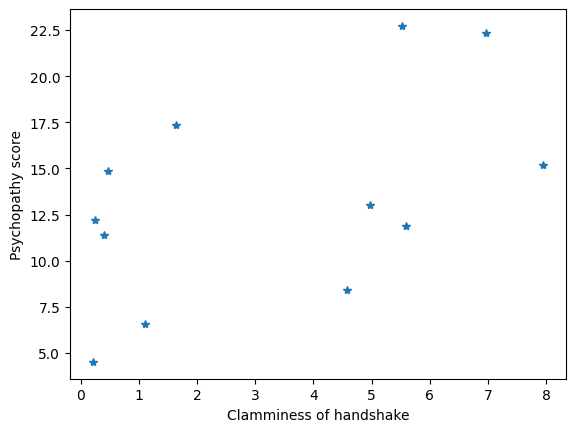

In [5]:
plt.plot(clammy, psychopathy, '*')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

There appears to be a potencial straight line relationship. Let's try to guess at a line to fit the data. Sor that I will try to intercept of $10$ and slope $0.9$:

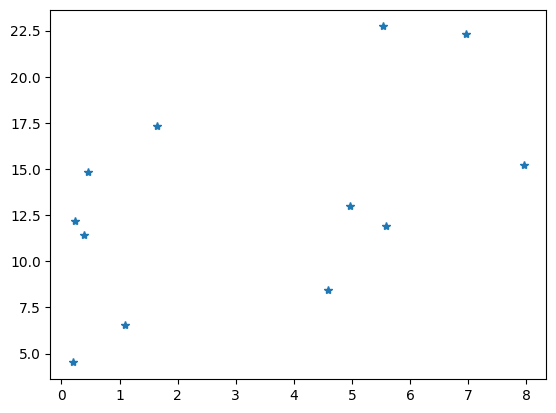

In [7]:
# Plot the data
plt.plot(clammy, psychopathy, '*')

In [8]:
def my_line(x):
    # My prediction for psychopathy given clamminess
    return 10 + 0.9 * x

Text(0.5, 1.0, 'Clammy vs psychopathy with guessed line')

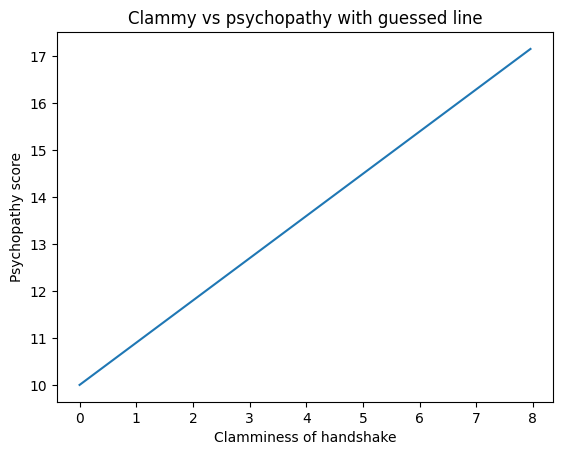

In [9]:
# Plot the prediction
x_vals = [0, max(clammy)]
y_vals = [my_line(0), my_line(max(clammy))]
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')
plt.title('Clammy vs psychopathy with guessed line')

The straight line relationship means that the values of `psychopathy` can be partly predicted by a straight line of formula `10 + clammy * 0.9`.

$\newcommand{\yvec}{\vec{y}} \newcommand{\xvec}{\vec{x}} \newcommand{\evec}{\vec{\varepsilon}}$

To make this more general:

-  `psychopathy` data will be Y, target, vector with 12 values, one for each student.
-  `clammy` score is a predictor. And the clammy scores vector will be another vector with 12 values, where the value for the first student (= 0.389) and so on.

In the straight line model we have that the intercept is **10** and the slope **0.9**

$y_i = 10 + 0.9 x_i$

Where is possible to say that each observation is equal to the predected value, and an additional error for each observation.

$y_i = c + bx_i + e_i$

# Simple regression in matrix form

So in matrix it will be:
$$
\left[\begin{matrix}11.416\\4.514\\12.204\\14.835\\8.416\\6.563\\17.343\\13.02\\15.19\\11.902\\22.721\\22.324\end{matrix}\right] = c \left[\begin{matrix}1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\end{matrix}\right] + b \left[\begin{matrix}0.389\\0.2\\0.241\\0.463\\4.585\\1.097\\1.642\\4.972\\7.957\\5.585\\5.527\\6.964\end{matrix}\right] + \left[\begin{matrix}e_{1}\\e_{2}\\e_{3}\\e_{4}\\e_{5}\\e_{6}\\e_{7}\\e_{8}\\e_{9}\\e_{10}\\e_{11}\\e_{12}\end{matrix}\right]
$$

which will be equal to

$$
\left[\begin{matrix}11.416\\4.514\\12.204\\14.835\\8.416\\6.563\\17.343\\13.02\\15.19\\11.902\\22.721\\22.324\end{matrix}\right] = \left[\begin{matrix}1 & 0.389\\1 & 0.2\\1 & 0.241\\1 & 0.463\\1 & 4.585\\1 & 1.097\\1 & 1.642\\1 & 4.972\\1 & 7.957\\1 & 5.585\\1 & 5.527\\1 & 6.964\end{matrix}\right] \left[\begin{matrix}c\\b\end{matrix}\right] + \left[\begin{matrix}e_{1}\\e_{2}\\e_{3}\\e_{4}\\e_{5}\\e_{6}\\e_{7}\\e_{8}\\e_{9}\\e_{10}\\e_{11}\\e_{12}\end{matrix}\right]
$$

## Multiple regression

Is also possible to think that psychopathy increases with age. So adding the
student’s age as another predictor:

In [10]:
age = [22.5,  25.3,  24.6,  21.4,
       20.7,  23.3,  23.8,  21.7,
       21.3, 25.2,  24.6,  21.8]

Now rename the `clammy` predictor vector.

In general, a linear model with $p$ predictors looks like this:


y_i = b_1 x_{1, i} + b_2 x_{2, i} + ... b_p x_{p, i} + e_i



Using this matrix algebra, what line do estimate for `psychopathy`
and `clammy`?

In [11]:
X = np.column_stack((np.ones(12), clammy))
X

array([[1.   , 0.389],
       [1.   , 0.2  ],
       [1.   , 0.241],
       [1.   , 0.463],
       [1.   , 4.585],
       [1.   , 1.097],
       [1.   , 1.642],
       [1.   , 4.972],
       [1.   , 7.957],
       [1.   , 5.585],
       [1.   , 5.527],
       [1.   , 6.964]])

In [12]:
# Use the pseudoinverse to get estimated B
B = npl.pinv(X).dot(psychopathy)
B

array([10.071286,  0.999257])

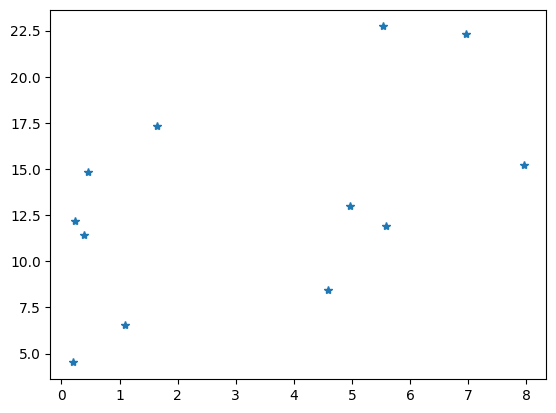

In [13]:
# Plot the data
plt.plot(clammy, psychopathy, '*')

In [14]:
def my_best_line(x):
    # Best prediction for psychopathy given clamminess
    return B[0] + B[1] * x

Text(0, 0.5, 'Psychopathy score')

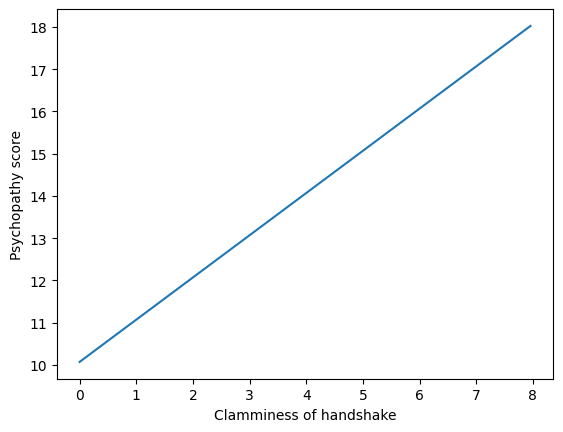

In [15]:
# Plot the new prediction
x_vals = [0, max(clammy)]
y_vals = [my_best_line(0), my_best_line(max(clammy))]
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

Our claim was that this estimate for slope and intercept minimize the sum of
squared error:

In [16]:
fitted = X.dot(B)
errors = psychopathy - fitted
print(np.sum(errors ** 2))

252.92560644993827


Is this sum of squared errors smaller than our earlier guess of an
intercept of 10 and a slope of 0.9?

In [17]:
fitted = X.dot([10, 0.9])
errors = psychopathy - fitted
print(np.sum(errors ** 2))

255.75076072


In [18]:
# Get t distribution code from scipy library
from scipy.stats import t as t_dist

In [19]:
def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast

    This is OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in
    $\e_i$ (i.i.d).
    """
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

For background on the probability values, see [p values from cumulative distribution functions](https://matthew-brett.github.io/teaching/on_cdfs.html) .

Is possible to say that `clammy` predict `psychopathy`?

If it does not, then the estimate of the slope will not be convincingly different from 0. The t test divides our estimate of the slope by the error in the estimate; large values mean that the slope is large compared to the error in the estimate.

In [20]:
X = np.column_stack((np.ones(12), clammy))
Y = np.asarray(psychopathy)
B, t, df, p = t_stat(Y, X, [0, 1])
t, p

(array([[1.914389]]), array([[0.042295]]))

<!-- dummy-coding: -->
# Dummy coding and the general linear model

So far this is *multiple regression*. Which means all the
columns (except the column of ones) are continuous vectors of numbers
predicting our outcome data `psychopathy`. These type of predictors
are often called *covariates*.

It is possible to use this same framework to express the fact that
different observations come from different groups.

Expressing group membership allows to express *analysis
of variance* designs using this same notation. So will be used columns of *dummy variables*.

Having as assumption the following:
- first 4 students come from Berkeley
- the second set of 4 come from Stanford
- the last set of 4 come from MIT.

Is it possible that the student’s college predicts if they are a psychopath?

To express this information, is possible to use the information about the clamminess score for now and just use the school information.
So the model will have 3 equations, one for each school.

To code this with predictors in the design, it will be used *indicator
variables*.

The “Berkeley” indicator variable vector is 1 when the student is from Berkeley and zero otherwise. Similarly for the other two
schools:

In [21]:
berkeley_indicator = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
stanford_indicator = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
mit_indicator      = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
X = np.column_stack((berkeley_indicator,
                    stanford_indicator,
                    mit_indicator))
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

These indicator columns are *dummy variables* where the values code for
the group membership.


In [22]:
B = npl.pinv(X).dot(psychopathy)
B

array([10.74225, 11.3355 , 18.03425])

In [24]:
np.mean(psychopathy[:4]), np.mean(psychopathy[4:8]), np.mean(psychopathy[8:])

(10.74225, 11.3355, 18.03425)

The MIT students appear to be a little more psychotic. Are they more
psychopathic than Berkeley and Stanford?

Is possible to use a contrast to test whether the mean for the MIT students is greater
than the mean of (mean for Berkeley, mean for Stanford):

In [25]:
B, t, df, p = t_stat(psychopathy, X, [-0.5, -0.5, 1])
t, p

(array([[2.340356]]), array([[0.021997]]))

Yes, as suspected, MIT students are more psychopathic than Berkeley and Standford.

The model above expresses the effect of group membership. It is the
expression of a one-way analysis of variance (ANOVA) model.

# ANCOVA in the General Linear Model

Making a ANCOVA model (analysis of covariance).

ANCOVA is a specific term for the case where we have a model with both
group membership (ANOVA model) and one or more continuous covariates.

For example, going back to clamminess score. Does it make any sense now that we know the student's school?

In [26]:
X = np.column_stack((berkeley_indicator,
                     stanford_indicator,
                     mit_indicator,
                     clammy))
X

array([[1.   , 0.   , 0.   , 0.389],
       [1.   , 0.   , 0.   , 0.2  ],
       [1.   , 0.   , 0.   , 0.241],
       [1.   , 0.   , 0.   , 0.463],
       [0.   , 1.   , 0.   , 4.585],
       [0.   , 1.   , 0.   , 1.097],
       [0.   , 1.   , 0.   , 1.642],
       [0.   , 1.   , 0.   , 4.972],
       [0.   , 0.   , 1.   , 7.957],
       [0.   , 0.   , 1.   , 5.585],
       [0.   , 0.   , 1.   , 5.527],
       [0.   , 0.   , 1.   , 6.964]])

We test the independent effect of the clamminess score with a contrast
on the clammy slope parameter:

In [27]:
B, t, df, p = t_stat(psychopathy, X, [0, 0, 0, 1])
t, p

(array([[-0.010661]]), array([[0.504122]]))

It appears like there’s not much independent effect of clamminess.  The palms of MIT students appear clammy, and the clammy score loses significance once the student's affiliation with MIT is established.

# Displaying the design matrix as an image

Design as an image, by scaling the values with columns, and have the same order of magnitude.



In [28]:
def scale_design_mtx(X):
    """utility to scale the design matrix for display

    This scales the columns to their own range so we can see the variations
    across the column for all the columns, regardless of the scaling of the
    column.
    """
    mi, ma = X.min(axis=0), X.max(axis=0)
    # Vector that is True for columns where values are not
    # all almost equal to each other
    col_neq = (ma - mi) > 1.e-8
    Xs = np.ones_like(X)
    # Leave columns with same value throughout with 1s
    # Scale other columns to min, max in column
    mi = mi[col_neq]
    ma = ma[col_neq]
    Xs[:,col_neq] = (X[:,col_neq] - mi)/(ma - mi)
    return Xs

Then we can display this scaled design with a title and some default
image display parameters:

In [29]:
def show_design(X, design_title):
    """ Show the design matrix nicely """
    plt.imshow(scale_design_mtx(X),
               interpolation='nearest',
               cmap='gray') # Gray colormap
    plt.title(design_title)

We can then see our ANCOVA design above at a glance:

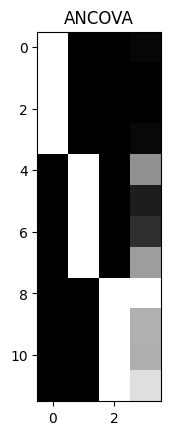

In [30]:
show_design(X, 'ANCOVA')

<!-- A file containing links and substitutions -->
<!-- vim: ft=rst -->
<!-- Version control -->
<!-- Editors -->
<!-- Python and common libraries -->
<!-- Virtualenv and helpers -->
<!-- Pypi and packaging -->
<!-- Mac development -->
<!-- Windows development -->
<!-- Nipy and friends -->
<!-- Mathematics -->
<!-- Licenses -->
<!-- Neuroimaging stuff -->
<!-- People -->
<!-- Substitutions -->